In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/Users/tjwilli/presentation.mplstyle")

In [ ]:
dt = 0.01
t = np.arange(0,10,dt)

#velocities
vx = np.zeros_like(t)
vy = np.zeros_like(t)
#positions
x = np.zeros_like(t)
y = np.zeros_like(t)

theta = np.deg2rad( 45 )
vx[0] = np.cos( theta )
vy[0] = np.sin( theta )

for i in range(1,t.size):
    x[i] = x[i-1] + vx[i-1] * dt
    vx[i] = vx[i-1]
    
    y[i] = y[i-1] + vy[i-1] * dt
    vy[i] = vy[i-1] - dt

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.ylim(0,0.6)
plt.xlim(-.1,1.1)
plt.ylabel(r'$y/r_0$')
plt.xlabel(r'$x/r_0$')
plt.gca().set_aspect('equal')
plt.title(r'$\theta$={:.0f}$^\circ$'.format(np.rad2deg(theta)))

### $\bar{v} = \frac{v}{v_i}$

### $\bar{t} = \frac{t}{v_i/g}$

### $\bar{x} = \frac{x}{v_i^2/g}$, $\bar{y}=\frac{y}{v_i^2/g}$

In [5]:
def projectile(theta,alpha):
    dt = 0.001
    t = np.arange(0,3,dt)

    #velocities
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    #positions
    x = np.zeros_like(t)
    y = np.zeros_like(t)

    #Initial conditions
    theta = np.deg2rad( theta )
    vx[0] = np.cos( theta )
    vy[0] = np.sin( theta )

    for i in range(1,t.size):
        #Magnitude of velocity vector
        v = np.hypot( vx[i-1], vy[i-1] )
        vy[i] = vy[i-1] - ( 1 + alpha * v * vy[i-1] ) * dt
        vx[i] = vx[i-1] - alpha * v * vx[i-1] * dt

        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
    
    return x,y
    

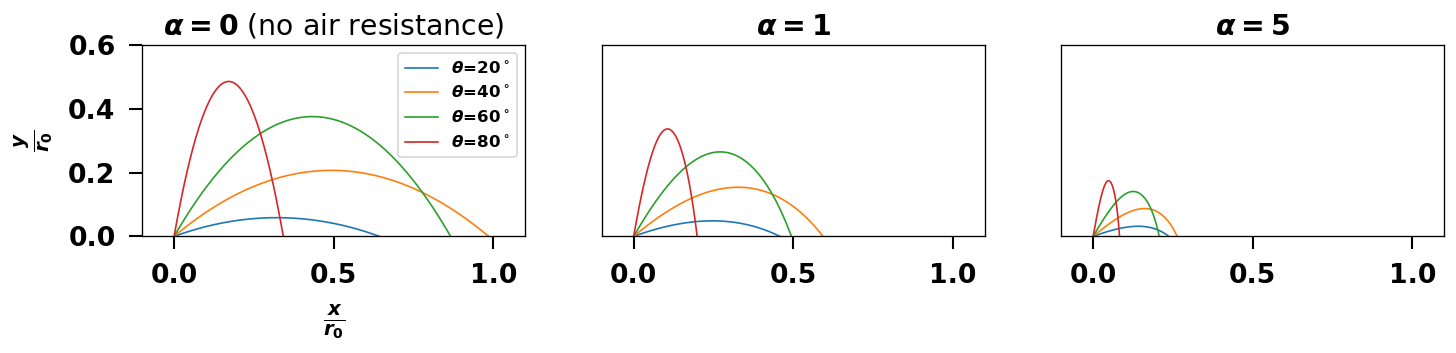

In [6]:
fig = plt.figure(figsize=(14,12))

plt.subplot(1,3,1)
for theta in np.arange(20,81,20):
    x,y = projectile(theta,0)
    plt.plot(x,y,label=r'$\theta$={:.0f}$^\circ$'.format(theta))
    plt.ylim(0,0.6)
    plt.xlim(-.1,1.1)
    plt.legend()
    plt.title(r'$\alpha=0$ (no air resistance)')
    plt.gca().set_aspect('equal')
    plt.xlabel(r'$\frac{x}{r_0}$')
    plt.ylabel(r'$\frac{y}{r_0}$')
    
plt.subplot(1,3,2)
for theta in np.arange(20,81,20):
    x,y = projectile(theta,1)
    plt.plot(x,y,label=r'$\theta$={:.0f}$^\circ$'.format(theta))
    plt.ylim(0,0.6)
    plt.xlim(-.1,1.1)
    #plt.legend()
    plt.title(r'$\alpha=1$')
    plt.gca().set_aspect('equal')
plt.gca().yaxis.set_visible(False)
plt.subplot(1,3,3)
for theta in np.arange(20,81,20):
    x,y = projectile(theta,5)
    plt.plot(x,y,label=r'$\theta$={:.0f}$^\circ$'.format(theta))
    plt.ylim(0,0.6)
    plt.xlim(-.1,1.1)
    #plt.legend()
    plt.title(r'$\alpha=5$')
    plt.gca().set_aspect('equal')
plt.gca().yaxis.set_visible(False)

In [ ]:
def projectile2(theta,alpha,v0=700,g=9.81):
    dt = 0.001
    t = np.arange(0,30,dt)

    y_atmos = 1e4 * g / v0**2
    #velocities
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    #positions
    x = np.zeros_like(t)
    y = np.zeros_like(t)

    #Initial conditions
    theta = np.deg2rad( theta )
    vx[0] = np.cos( theta )
    vy[0] = np.sin( theta )

    for i in range(1,t.size):
        dens = np.exp( -y[i-1] / y_atmos)
        #Magnitude of velocity vector
        v = np.hypot( vx[i-1], vy[i-1] )
        vy[i] = vy[i-1] - ( 1 + dens * alpha * v * vy[i-1] ) * dt
        vx[i] = vx[i-1] - dens * alpha * v * vx[i-1] * dt

        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
    
    return x,y

In [ ]:
fig = plt.figure(figsize=(14,12))
plt.subplot(1,2,1)
for theta in np.arange(20,81,20):
    x,y = projectile(theta,1)
    plt.plot(x,y,label=r'$\theta$={:.0f}$^\circ$'.format(theta))
    plt.ylim(0,.6)
    plt.xlim(-.1,1.1)
    plt.legend()
    plt.title(r'$\alpha=1$, $\frac{d\rho}{dy}=0$')
    plt.gca().set_aspect('equal')
    plt.xlabel(r'$\frac{x}{r_0}$')
    plt.ylabel(r'$\frac{y}{r_0}$')
    
    
plt.subplot(1,2,2)
for theta in np.arange(20,81,20):
    x,y = projectile2(theta,1)
    plt.plot(x,y,label=r'$\theta$={:.0f}$^\circ$'.format(theta))
    plt.ylim(0,.6)
    plt.xlim(-.1,1.1)
    plt.legend()
    plt.title(r'$\alpha=1$, $\frac{d\rho}{dy}\neq0$')
    plt.gca().set_aspect('equal')
    plt.xlabel(r'$\frac{x}{r_0}$')
    plt.ylabel(r'$\frac{y}{r_0}$')
plt.gca().yaxis.set_visible(False)

### With units

In [11]:
#INPUT PARAMETERS
#Initial velocity
v0 = 700 # m/s, cannon shell
#v0 = 50  # m/s, batted baseball
#v0 = 10 #/ms, something slower
#v0=1 ???

#Initial direction
theta = 45 #degrees

#Gravity
g = 9.8 #m/s2

#Drag (B2/m)
b2m = 4e-5 #m-1 standard
#b2m = 0 #vaccum

#Loop parameters
dt = 0.001 #seconds
t = np.arange(0,200,dt) #seconds

#velocity arrays
vx = np.zeros_like(t)
vy = np.zeros_like(t)
#positions
x = np.zeros_like(t)
y = np.zeros_like(t)

#Initial conditions
theta = np.deg2rad( theta )
vx[0] = v0 * np.cos( theta )
vy[0] = v0 * np.sin( theta )

for i in range(1,t.size):
    #Magnitude of velocity vector
    v = np.hypot( vx[i-1], vy[i-1] )
    #new vy
    vy[i] = vy[i-1] - ( g + b2m * v * vy[i-1] ) * dt
    #new vx
    vx[i] = vx[i-1] - b2m * v * vx[i-1] * dt
    #new x
    x[i] = x[i-1] + vx[i-1] * dt
    #new y
    y[i] = y[i-1] + vy[i-1] * dt

    
#Find out where we land and print
land = np.where(y>0)[0].max()
tland = t[land]
xrange = x[land]
print( r'Delta t: {} seconds'.format(dt))
print( 'Time of flight: {} seconds'.format( tland) )
print( 'X-range: {:.2E} meters'.format(xrange))
print( 'Y-max: {:.2E} meters'.format(y.max()))


if 1:
    t0 = v0/g
    y0 = v0*t0
    print()
    print('Time unit: {:.2f} seconds'.format(t0))
    print('Length unit: {:.2E} meters'.format(y0))

Delta t: 0.001 seconds
Time of flight: 77.41 seconds
X-range: 2.17E+04 meters
Y-max: 7.45E+03 meters

Time unit: 71.43 seconds
Length unit: 5.00E+04 meters


In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.xlim(0,xrange*1.1)
plt.ylim(0,y.max()*1.1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(r'$v_0=${} m s$^{{-1}}$,$\ \frac{{B_2}}{{m}}=${} m$^{{-1}}$'.format(v0,b2m))
plt.gca().set_aspect('equal')

494.97474683058323


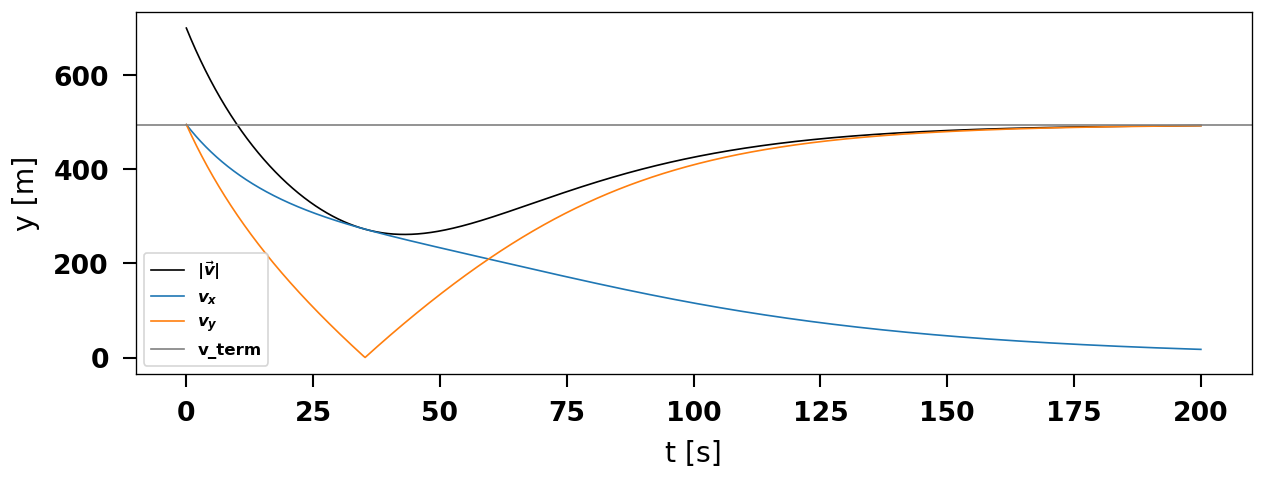

In [12]:
plt.figure(figsize=(12,4))
plt.plot(t,np.hypot(vx,vy),c='k',label=r'$|\vec{v}|$')
plt.plot(t,np.abs(vx),label=r'$v_x$')
plt.plot(t,np.abs(vy),label=r'$v_y$')
plt.xlabel('t [s]')
plt.ylabel('y [m]')


if 1: 
    if b2m:
        vterm = np.sqrt( 1/b2m * g )
        plt.axhline(vterm,c='gray',label='v_term')
        print(vterm)
        
plt.legend(loc='lower left')

In [13]:
#v0 = 70 # m/s, cannon shell
v0 = 50  # m/s, batted baseball
#v0 = 10
#v0=1
theta = 0 #degrees
g = 9.8 #m/s2
S0m = 4.1e-4 #S0/m, Giordano
dt = 0.001 #seconds
t = np.arange(0,3,dt) #seconds


#C is a function of V
#Giordano, 2.26
def C(v):
    return 0.0039 + 0.0058 / ( 1 + np.exp( (v-35)/5 ) )

#velocities
vx = np.zeros_like(t)
vy = np.zeros_like(t)
vz = np.zeros_like(t)

#positions
x = np.zeros_like(t)
y = np.zeros_like(t)
z = np.zeros_like(t)

#Initial conditions
theta = np.deg2rad( theta )
vx[0] = v0 * np.cos( theta )
vy[0] = v0 * np.sin( theta )
#Pitcher starts above home plate
y[0] = 2.3
w = 30
w0 = np.array( [0,w,0] )

for i in range(1,t.size):
    #Magnitude of velocity vector
    v = np.linalg.norm( [vx[i-1], vy[i-1], vz[i-1]] )
    vy[i] = vy[i-1] - g * dt - C(v) * v * vy[i-1] * dt + S0m * (w0[2]*vx[i-1] - w0[0]*vz[i-1]) * dt
    vx[i] = vx[i-1] - C(v) * v * vx[i-1] * dt + S0m * (w0[1]*vz[i-1]-w0[2]*vy[i-1]) * dt
    vz[i] = vz[i-1] - C(v) * v * vz[i-1] * dt + S0m * (w0[0]*vy[i-1] + w0[1]*vx[i-1] ) * dt

    x[i] = x[i-1] + vx[i-1] * dt
    y[i] = y[i-1] + vy[i-1] * dt
    z[i] = z[i-1] + vz[i-1] * dt

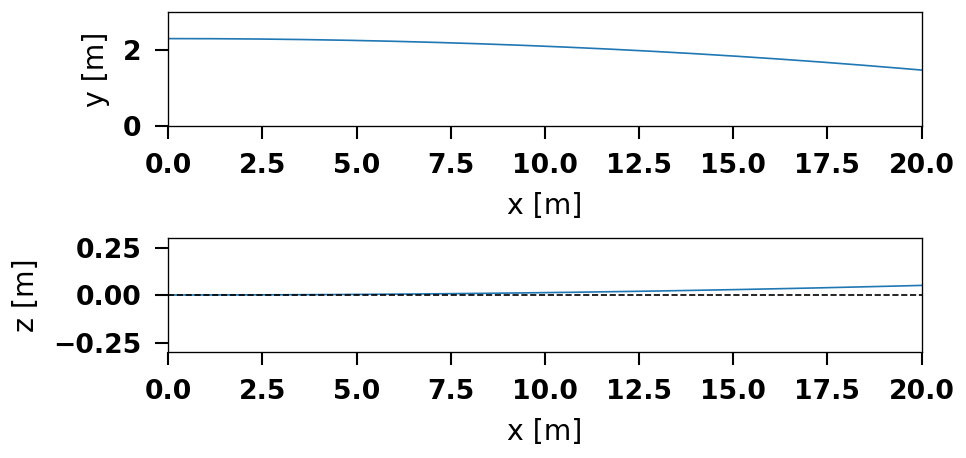

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xlim(0,20)
plt.ylim(0,3)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.subplot(2,1,2)
plt.plot(x,z)
plt.axhline(0,c='k',ls='--')
plt.xlim(0,20)
plt.ylim(-.3,.3)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.tight_layout()
#plt.gca().set_aspect('equal')

### Golf

In [23]:
v0 = 70 # m/s, cannon shell
theta = 60 #degrees
g = 9.8 #m/s2
dt = 0.001 #seconds
t = np.arange(0,15,dt) #seconds

def C(v):
    """Variable drag coefficeint for a golf ball (Giordano)"""
    a = 7 * np.pi * (42.67 / 1e3)**2 
    if v < 14:
        return a * 0.5 
    
    return a * 7.0 / v 

#velocities
vx = np.zeros_like(t)
vy = np.zeros_like(t)
vz = np.zeros_like(t)

#positions
x = np.zeros_like(t)
y = np.zeros_like(t)
z = np.zeros_like(t)

#Initial conditions
theta = np.deg2rad( theta )
vx[0] = v0 * np.cos( theta )
vy[0] = v0 * np.sin( theta )

S0 = 1.0 #Giordano
w = -0.25
#w = 0
w0 = np.array( [0,0,w] )

for i in range(1,t.size):
    #Magnitude of velocity vector
    v = np.linalg.norm( [vx[i-1], vy[i-1], vz[i-1]] )
    vy[i] = vy[i-1] - g * dt - C(v) * v * vy[i-1] * dt + S0 * (w0[2]*vx[i-1] - w0[0]*vz[i-1]) * dt
    vx[i] = vx[i-1] - C(v) * v * vx[i-1] * dt + S0 * (w0[1]*vz[i-1]-w0[2]*vy[i-1]) * dt
    vz[i] = vz[i-1] - C(v) * v * vz[i-1] * dt + S0 * (w0[0]*vy[i-1] + w0[1]*vx[i-1] ) * dt

    x[i] = x[i-1] + vx[i-1] * dt
    y[i] = y[i-1] + vy[i-1] * dt

land = np.where(y>0)[0].max()
tland = t[land]
xrange = x[land]
print( r'Delta t: {} seconds'.format(dt))
print( 'Time of flight: {} seconds'.format( tland) )
print( 'X-range: {:.2E} meters'.format(xrange))
print( 'Y-max: {:.2E} meters'.format(y.max()))


if False:
    t0 = v0/g
    y0 = v0*t0
    print()
    print('Time unit: {:.2f} seconds'.format(t0))
    print('Length unit: {:.2E} meters'.format(y0))

Delta t: 0.001 seconds
Time of flight: 5.795 seconds
X-range: 1.27E+02 meters
Y-max: 6.26E+01 meters


Text(0, 0.5, 'y [m]')

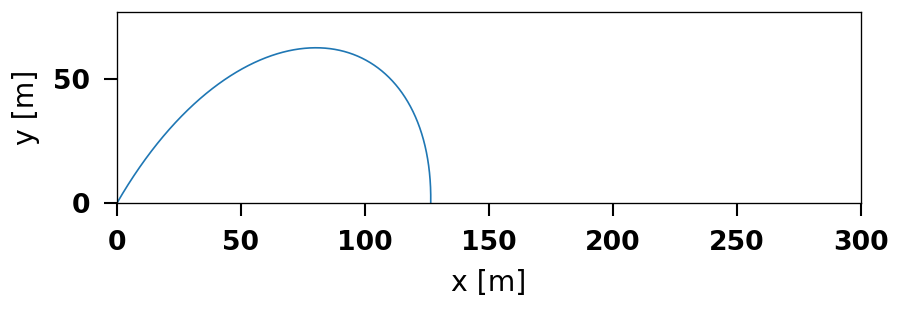

In [24]:
plt.plot(x,y)
plt.xlim(0,300)
plt.ylim(0)
plt.gca().set_aspect('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

In [ ]:
plt.plot(vy)